## 

In [12]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
from torch import nn

C:\Users\New User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.10) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


## Data preparation

Fot this model I am using MNIST dataset.
[MNIST](https://medium.com/mlearning-ai/mnist-dataset-of-handwritten-digits-f8cf28edafe#:~:text=MNIST%20is%20a%20widely%20used,standard%20benchmark%20for%20classification%20tasks.) is a widely used dataset of handwritten digits that contains 60,000 handwritten digits for training a machine learning model and 10,000 handwritten digits for testing the model. It was introduced in 1998 and has become a standard benchmark for classification tasks.

In [13]:
train_dataset = MNIST(
            root='data',
            download=True,
            train=True,
            transform=transforms.ToTensor()
    )
test_dataset = MNIST(
            root='data',
            download=True,
            train=False,
            transform=transforms.ToTensor()
    )


batch_size = 64
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

## Model and Train/Test

In [15]:
from CustomNN import ImageNN,train_nn,test_nn,predicted_digit

In [16]:
model = ImageNN()
optimizer = optim.SGD(model.parameters(),lr=0.05)
device = ('cuda' if torch.cuda.is_available() else 'cpu')
loss_function = nn.CrossEntropyLoss()

In [17]:
model

ImageNN(
  (linear1): Linear(in_features=784, out_features=512, bias=True)
  (act1): ReLU()
  (linear2): Linear(in_features=512, out_features=256, bias=True)
  (act2): ReLU()
  (linear3): Linear(in_features=256, out_features=256, bias=True)
  (act3): ReLU()
  (linear4): Linear(in_features=256, out_features=128, bias=True)
  (act4): ReLU()
  (linear5): Linear(in_features=128, out_features=10, bias=True)
)

This model has 4 hidden layers with __ReLU__ activation function, the the output layer with __Softmax__ activation function. To train this model I using __Stochastic Gradient Descent__ as optimizer (lr = 0.05) and __Cross Entropy__ as loss function.

In [18]:
for epoch in range(1,30):
    train_nn(device,model,train_loader,optimizer,loss_function,epoch)
    test_nn(device,model,test_loader,loss_function)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.296347
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.112554
Train Epoch: 1 [12800/60000 (21%)]	Loss: 1.832420
Train Epoch: 1 [19200/60000 (32%)]	Loss: 1.707110
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.750867
Train Epoch: 1 [32000/60000 (53%)]	Loss: 1.765913
Train Epoch: 1 [38400/60000 (64%)]	Loss: 1.794994
Train Epoch: 1 [44800/60000 (75%)]	Loss: 1.745160
Train Epoch: 1 [51200/60000 (85%)]	Loss: 1.666723
Train Epoch: 1 [57600/60000 (96%)]	Loss: 1.698676

Test Accuracy: 81.91%
Test loss: 259.2777101993561

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.699556
Train Epoch: 2 [6400/60000 (11%)]	Loss: 1.635442
Train Epoch: 2 [12800/60000 (21%)]	Loss: 1.614103
Train Epoch: 2 [19200/60000 (32%)]	Loss: 1.655884
Train Epoch: 2 [25600/60000 (43%)]	Loss: 1.639693
Train Epoch: 2 [32000/60000 (53%)]	Loss: 1.607255
Train Epoch: 2 [38400/60000 (64%)]	Loss: 1.604281
Train Epoch: 2 [44800/60000 (75%)]	Loss: 1.560385
Train Epoch: 2 [51200/60000 (85%)]	Loss: 1.634132
Train Epo


Test Accuracy: 87.44%
Test loss: 248.79726433753967

Train Epoch: 16 [0/60000 (0%)]	Loss: 1.588636
Train Epoch: 16 [6400/60000 (11%)]	Loss: 1.630109
Train Epoch: 16 [12800/60000 (21%)]	Loss: 1.588833
Train Epoch: 16 [19200/60000 (32%)]	Loss: 1.598684
Train Epoch: 16 [25600/60000 (43%)]	Loss: 1.614029
Train Epoch: 16 [32000/60000 (53%)]	Loss: 1.583199
Train Epoch: 16 [38400/60000 (64%)]	Loss: 1.491922
Train Epoch: 16 [44800/60000 (75%)]	Loss: 1.599539
Train Epoch: 16 [51200/60000 (85%)]	Loss: 1.543099
Train Epoch: 16 [57600/60000 (96%)]	Loss: 1.540288

Test Accuracy: 87.33%
Test loss: 249.0330332517624

Train Epoch: 17 [0/60000 (0%)]	Loss: 1.586046
Train Epoch: 17 [6400/60000 (11%)]	Loss: 1.571800
Train Epoch: 17 [12800/60000 (21%)]	Loss: 1.613913
Train Epoch: 17 [19200/60000 (32%)]	Loss: 1.586005
Train Epoch: 17 [25600/60000 (43%)]	Loss: 1.537768
Train Epoch: 17 [32000/60000 (53%)]	Loss: 1.555798
Train Epoch: 17 [38400/60000 (64%)]	Loss: 1.582938
Train Epoch: 17 [44800/60000 (75%)]	Lo

In [20]:
torch.save(model.state_dict(),"model_1.pth")

##  Recognize digits based on handwritten images

The following function will return digit based on handritten images (jpeg,png or other forma PIL.Image can open). Also you can try it youself by following this [link](https://handwritten-digit-recognition-6ky1.onrender.com/).

In [28]:
# from PIL import Image module to open images 
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np


Predicted label: 2



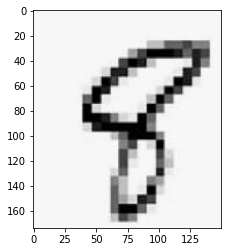


Predicted label: 2



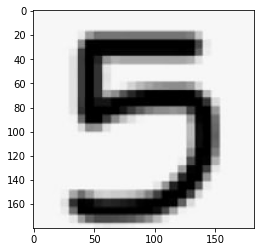


Predicted label: 3



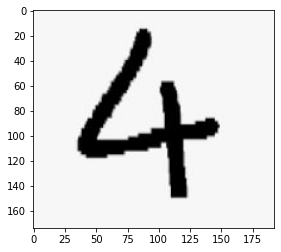


Predicted label: 2



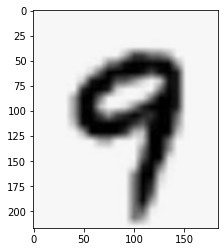


Predicted label: 0



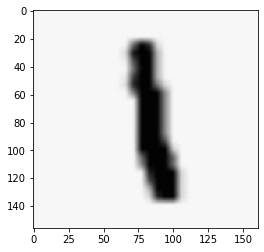


Predicted label: 2



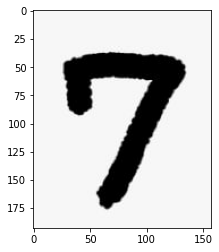


Predicted label: 3



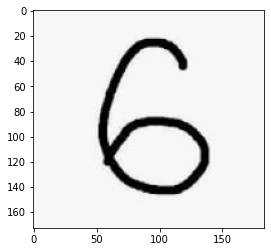


Predicted label: 8



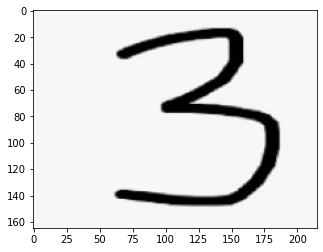


Predicted label: 3



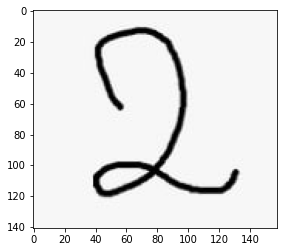


Predicted label: 3



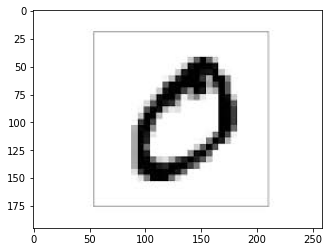

In [33]:
path = "./Images"
for file in os.listdir(path):
    image = Image.open(file)
    print(f"\nPredicted label: {predicted_digit(model=model,image=image)}\n")
    plt.imshow(np.array(image))
    plt.show()